In [142]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [143]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [144]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [145]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [146]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data.info()
#market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"]])
    
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_market_data)
df_normalized = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)


df_normalized.head()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [147]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_normalized.values, columns=df_normalized.columns)

# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_scaled.set_index('coin_id', inplace=True)


# Display sample data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [148]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [149]:
# Create an empty list to store the inertia values
import numpy as np
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertia_values.append(model.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [150]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,64.008153
5,6,53.548593
6,7,43.888539
7,8,37.348403
8,9,32.161417
9,10,28.246469


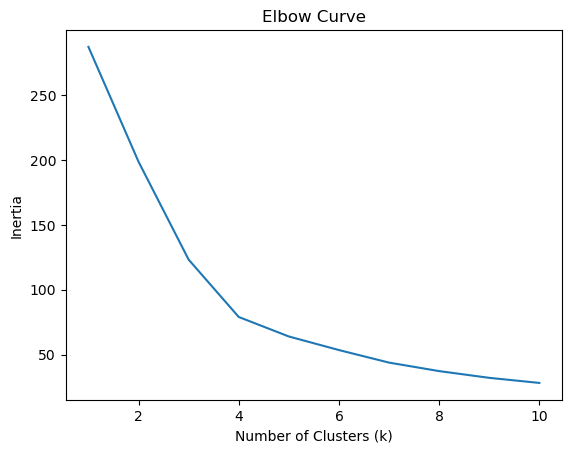

In [151]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot the line chart
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [152]:
# Initialize the K-Means model using the best value for k
kmeans_4 = KMeans(n_clusters=4)


In [153]:
# Fit the K-Means model using the scaled data
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [154]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(df_scaled)


# Print the resulting array of cluster values.
print(cluster_labels)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 2 0 3 3 1
 3 3 3 3]


In [155]:
# Create a copy of the DataFrame
df_copy = df_normalized.copy()


In [156]:
# Add a new column to the DataFrame with the predicted clusters
df_normalized['cluster'] = model.labels_


# Display sample data
df_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


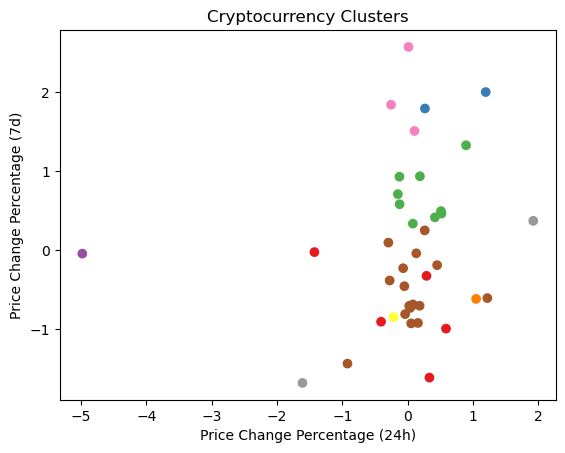

In [157]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(df_normalized["price_change_percentage_24h"], df_normalized["price_change_percentage_7d"], c=df_normalized["cluster"], cmap="Set1")

# Add labels and title
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.title("Cryptocurrency Clusters")

# Show the plot
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [158]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [159]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 
pca = PCA(n_components=3)

pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
df_pca.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [160]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166 or 89.95%

In [161]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
df_pca['coin_id'] = df_market_data.index

df_pca.set_index('coin_id', inplace=True)

df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [162]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [163]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

import numpy as np

inertia_values = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertia_values.append(model.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [164]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": range(1, 11), "inertia": inertia_values}
#df_elbow = pd.DataFrame(elbow_data)
df_elbow_pca = pd.DataFrame(elbow_data)

df_elbow_pca


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668117
9,10,10.484890


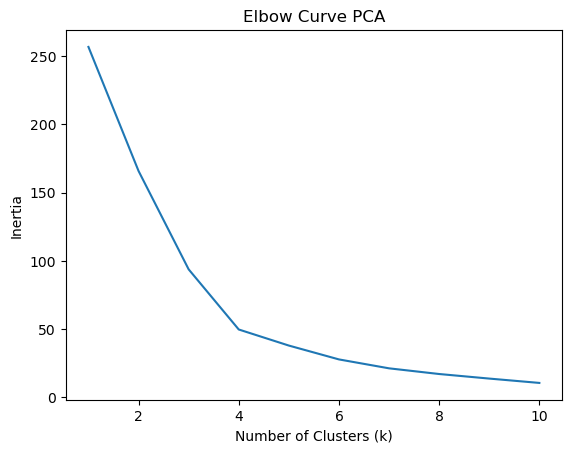

In [165]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve PCA')

plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is still the best value


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ because best k value is 4 in both cases


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [166]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)

In [167]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [168]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [169]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = clusters


# Display sample data
df_pca_copy.head()


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


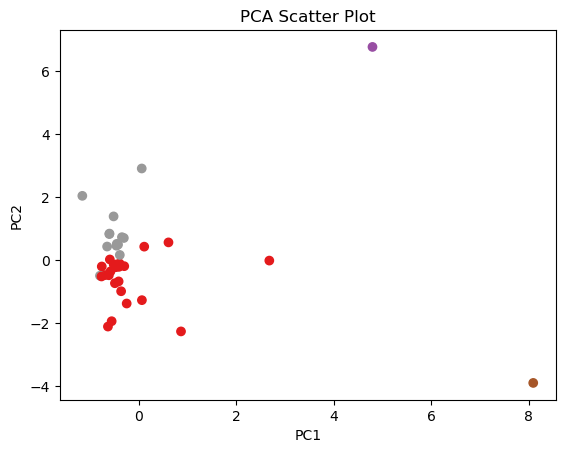

In [182]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import matplotlib.pyplot as plt

plt.scatter(df_pca_copy['PC1'], df_pca_copy['PC2'], c=df_pca_copy['cluster'], cmap='Set1')

plt.title("PCA Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [185]:
# Composite plot to contrast the Elbow curves


# Create elbow curve plot for the original data
elbow_original_plot = df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve (Original Data)', xlabel='Number of Clusters (k)', ylabel='Inertia', width=500)

# Create elbow curve plot for the PCA data
elbow_pca_plot = df_elbow_pca.hvplot.line(x='k', y='inertia', title='Elbow Curve (PCA Data)', xlabel='Number of Clusters (k)', ylabel='Inertia', width=500)

# Composite plot using the plus (+) operator
composite_elbow_plot = elbow_original_plot + elbow_pca_plot

# Display the composite plot
composite_elbow_plot



:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [186]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Create the scatter plot for the original data
original_plot = df_normalized.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c=cluster_labels, 
    cmap='Set1', 
    title='Original Clusters',
    width=500  # Adjust the width

)

# Create the scatter plot for the PCA data
pca_plot = df_pca.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c=clusters, 
    cmap='Set1', 
    title='PCA Clusters',
    width=500  # Adjust the width

)

# Create the composite plot by adding the two plots together
composite_plot = original_plot + pca_plot

# Display the composite plot
composite_plot


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,_color)
   .Scatter.II :Scatter   [PC1]   (PC2,_color)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Fewer features offer simplification, interpretability, and scalability, but may risk information loss and sensitivity to feature selection. 